<a href="https://colab.research.google.com/github/Clodellet/Clodellet.github.io/blob/main/FCT6_Rubio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 6
<font color='violet'>Rubio Ruiz Claudia Daniela<br>
Física Computacional
</font>  

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import math

## 5. El péndulo doble

### (a) Deriva una expresión para la energía total E = T + V del sistema en términos de las variables $\theta_1, \theta_2$ y $\omega_1, \omega_2$ más las constantes g, m  y l.

Del apéndice A tenemos que las alturas de las dos pesas, medidas desde el nivel del pivote, son:

> $h_1=-l\cos\theta_1, h_2=-l(\cos\theta_1+\cos\theta_2)$

Por lo que la energía potencial $V=mgh_1+mgh_2$ es:

>$V=mg(-l\cos\theta_1)+mg(-l(\cos\theta_1+\cos\theta_2))=-mgl(2\cos\theta_1+\cos\theta_2)$

Mientras que las velocidades lineales de las dos pesas están dadas por:

>$v_1=l\dot{\theta_1}, v_2^2=l^2(\dot{\theta_1^2}+\dot{\theta_2^2}+2\dot{\theta_1}\dot{\theta_2}\cos(\theta_1-\theta_2)) $

Por lo que la energía cinética $T=\frac{1}{2}m(v_1^2+v_2^2)$ es:

>$T=\frac{1}{2}m(l^2\dot{\theta_1^2}+l^2(\dot{\theta_1^2}+\dot{\theta_2^2}+2\dot{\theta_1}\dot{\theta_2}\cos(\theta_1-\theta_2)))$

>$=\frac{1}{2}ml^2(2\dot{\theta_1^2}+\dot{\theta_2^2}+2\dot{\theta_1}\dot{\theta_2}\cos(\theta_1-\theta_2))$

De modo que E = T + V:

>$E = (\frac{1}{2}ml^2[2\dot{\theta_1^2}+\dot{\theta_2^2}+2\dot{\theta_1}\dot{\theta_2}\cos(\theta_1-\theta_2)]) + (-mgl(2\cos\theta_1+\cos\theta_2))$




Como $\dot{\theta_1}=\omega_1$ y $\dot{\theta_2}=\omega_2$

$⇒E = \frac{1}{2}ml^2[2\omega_1^2+\omega_2^2+2\omega_1\omega_2\cos(\theta_1-\theta_2)] -mgl(2\cos\theta_1+\cos\theta_2)$

### (b) Escribe un programa usando el método de Runge-Kutta de cuarto orden, para resolver las ecuaciones de movimiento para el caso donde l=40 cm, con las condiciones iniciales $\theta_1=\theta_2=90°$ y $\omega_1=\omega_2=0$.


In [56]:
#Método de Runge-Kutta de 4to orden para 1D ODE
#ligeramente reestructurado para usar un array

def RungeKutta4_1D(f, x0, t0, tf, h):
    T = []
    X = []

    T.append(t0)
    X.append(x0)

    t = t0
    x = x0

    while t < tf:
        k1 = np.array(f(t, x)) * h
        k2 = np.array(f(t + h/2, x + k1/2)) * h
        k3 = np.array(f(t + h/2, x + k2/2)) * h
        k4 = np.array(f(t + h, x + k3)) * h

        x = x + (k1 + 2*k2 + 2*k3 + k4) / 6
        t = t + h

        X.append(x)
        T.append(t)

    return np.array(X), np.array(T)

Las ecuaciones de movimiento están dadas como:

$\dot{\omega_1}=-\frac{\omega_1^2\sin(2\theta_1-2\theta_2)+2\omega_2^2\sin(\theta_1-\theta_2)+(g/l)[\sin(\theta_1-2\theta_2)+3\sin\theta_1]}{3-\cos(2\theta_1-2\theta_2)}$

$\dot{\omega_2}=\frac{4\omega_1^2\sin(\theta_1-\theta_2)+\omega_2^2\sin(2\theta_1-2\theta_2)+2(g/l)[\sin(2\theta_1-\theta_2)-\sin\theta_2]}{3-\cos(2\theta_1-2\theta_2)}$

In [53]:
#constantes
g=9.81 #m/s
l=0.4 #m
omega_1, omega_2 = 0, 0
theta_1, theta_2 = np.pi/2, np.pi/2


#ECUACIONES DE MOVIMIENTO
def omegadot1(omega_1, omega_2, theta_1, theta_2, g, l):
  numerador =((omega_1**2)*np.sin(2*theta_1 - 2*theta_2)+2*(omega_2**2)*np.sin(theta_1 - theta_2)+(g/l)*(np.sin(theta_1 - 2*theta_2) + 3*np.sin(theta_1)))
  return -(numerador)/(3 - np.cos(2*theta_1 - 2*theta_2))

def omegadot2(omega_1, omega_2, theta_1, theta_2, g, l):
  numerador =(4*(omega_1**2)*np.sin(theta_1 - theta_2)+(omega_2**2)*np.sin(2*theta_1 - 2*theta_2)+2*(g/l)*(np.sin(2*theta_1 - theta_2) - np.sin(theta_2)))
  return (numerador)/(3 - np.cos(2*theta_1 - 2*theta_2))

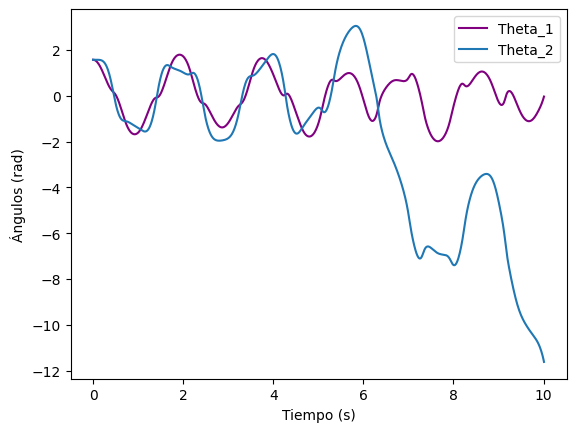

In [59]:
# Constantes renombradas
g = 9.81  # m/s^2
l = 0.4   # m
theta_1_0 = theta_2_0 = np.pi / 2
omega_1_0 = omega_2_0 = 0

# Sistema de ODEs
def sistema_pendulo_doble(t, state):
    omega_1, omega_2, theta_1, theta_2 = state
    omega_1_dot = omegadot1(omega_1, omega_2, theta_1, theta_2, g, l)
    omega_2_dot = omegadot2(omega_1, omega_2, theta_1, theta_2, g, l)
    return [omega_1_dot, omega_2_dot, omega_1, omega_2]


#condiciones iniciales
iniciales = [omega_1_0, omega_2_0, theta_1_0, theta_2_0]

# Tiempo y h
t0 = 0
tf = 10
h = 0.01

# Solución al sistema por Runge-Kutta de 4to orden
solucion, time_points = RungeKutta4_1D(sistema_pendulo_doble, iniciales, t0, tf, h)

# Resultados
omega_1_solucion = solucion[:, 0]
omega_2_solucion = solucion[:, 1]
theta_1_solucion = solucion[:, 2]
theta_2_solucion = solucion[:, 3]

# Graficar
plt.plot(time_points, theta_1_solucion, label='Theta_1', color='purple')
plt.plot(time_points, theta_2_solucion, label='Theta_2')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulos (rad)')
plt.legend()
plt.show()

In [64]:
print(omega_1_solution)

[ 0.         -0.24524971 -0.49049167 ...  6.13655281  6.66092748
  7.30890392]


Usa tu programa para calcular la energía total del sistema suponiendo que la masa de las pesas es 1 kg cada una, y haz una gráfica de la energía en función del tiempo desde t = 0 hasta t = 100 segundos.

$E = \frac{1}{2}ml^2[2\omega_1^2+\omega_2^2+2\omega_1\omega_2\cos(\theta_1-\theta_2)] -mgl(2\cos\theta_1+\cos\theta_2)$

[-7.208271059781322e-16, -6.029504048821188e-10, -2.4109640325842285e-09, -5.414547199489306e-09, -9.574266407463838e-09, -1.4786628671492608e-08, -2.0843124948211056e-08, -2.739662330331072e-08, -3.396077774553419e-08, -3.997854980397619e-08, -4.4995879355802515e-08, -4.8952921272160665e-08, -5.2549440354709986e-08, -5.756199006334839e-08, -6.692628806703738e-08, -8.44063947624818e-08, -1.1379179598591804e-07, -1.5776660999833325e-07, -2.1677804307174142e-07, -2.8827446474366525e-07, -3.665463288449189e-07, -4.4316336467176143e-07, -5.077988500801212e-07, -5.491655477030122e-07, -5.558603382027627e-07, -5.170543344590328e-07, -4.2309066650147997e-07, -2.661168547746229e-07, -4.087862670587583e-08, 2.5424026173226366e-07, 6.159030183638947e-07, 1.03424267727803e-06, 1.4910509147370021e-06, 1.957758291482037e-06, 2.3932795070180646e-06, 2.7420902384278634e-06, 2.9338628682040735e-06, 2.8883074971730593e-06, 2.5329955768427226e-06, 1.845670530187249e-06, 9.24758113640678e-07, 4.775638196

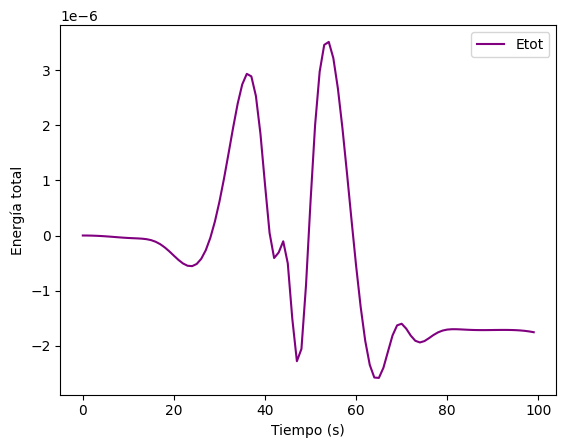

In [95]:
# Energía total del sistema
def Etotal(m, g, l, omega1, omega2, theta1, theta2):
  return 0.5*m*(l**2) * (2*(omega1**2) + omega2**2 + 2*omega1*omega2*np.cos(theta1-theta2))- m*g*l*(2*np.cos(theta1) + np.cos(theta2))


# Solución al sistema por Runge-Kutta de 4to orden
solucion, time_points = RungeKutta4_1D(sistema_pendulo_doble, iniciales, 0, 100, h)

# Resultados
omega_1_solucion = solucion[:, 0]
omega_2_solucion = solucion[:, 1]
theta_1_solucion = solucion[:, 2]
theta_2_solucion = solucion[:, 3]

#Energía total del sistema con Runge-Kutta
Etot = []
for i in range (0, 100):
  y = Etotal(1,g,l, omega_1_solucion[i], omega_2_solucion[i], theta_1_solucion[i], theta_2_solution[i])
  Etot.append(y)


print(Etot)
print(omega_1_solucion)
x = np.linspace(0,100)
# Graficar

plt.plot(Etot, label='Etot', color='purple')

plt.xlabel('Tiempo (s)')
plt.ylabel('Energía total')
plt.legend()
plt.show()